In [81]:
from pathlib import Path
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from web3 import Web3
import streamlit as st

In [82]:
cars_df = pd.read_csv(Path("used_cars_data.csv"), parse_dates=True, infer_datetime_format=True)
cars_df = cars_df.drop(['description','dealer_zip','sp_name','torque','wheelbase','width','vin'],axis=1)

In [83]:
cars_df.isnull().sum()


body_type               0
city                    0
daysonmarket            0
engine_cylinders        0
exterior_color          0
fleet                   0
frame_damaged           0
franchise_dealer        0
franchise_make          0
has_accidents           0
horsepower              1
interior_color          0
isCab                   0
is_new                  0
latitude                0
listed_date             0
listing_color           0
listing_id              0
longitude               0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
owner_count             0
power                   0
price                   0
seller_rating           0
sp_id                   0
theft_title             0
transmission            0
trim_name               0
wheel_system            0
wheel_system_display    0
year                    0
dtype: int64

In [85]:
cars_df['horsepower'] = cars_df['horsepower'].fillna(cars_df['horsepower'].mean())
enc = OneHotEncoder(sparse=False)
list(cars_df.dtypes[cars_df.dtypes == "object"].index)

['body_type',
 'city',
 'engine_cylinders',
 'exterior_color',
 'franchise_make',
 'interior_color',
 'listed_date',
 'listing_color',
 'make_name',
 'maximum_seating',
 'model_name',
 'power',
 'transmission',
 'trim_name',
 'wheel_system',
 'wheel_system_display']

In [86]:
categorical_variables = ['body_type',
 'city',
 'engine_cylinders',
 'exterior_color',
 'franchise_make',
 'interior_color',
 'listed_date',
 'listing_color',
 'make_name',
 'maximum_seating',
 'model_name',
 'power',
 'transmission',
 'trim_name',
 'wheel_system',
 'wheel_system_display']

In [87]:
encoded_data = enc.fit_transform(cars_df[categorical_variables])
encoded_df = pd.DataFrame(encoded_data, columns = enc.get_feature_names(categorical_variables))
encoded_df.head()

C:\Users\micha\anaconda3\envs\dev\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,body_type_Convertible,body_type_Coupe,body_type_Hatchback,city_Bryn Mawr,city_Edison,city_Greensboro,city_Greenwich,city_Hinsdale,city_Lake Bluff,city_Norwood,...,trim_name_Roadster RWD,trim_name_Speciale Coupe RWD,trim_name_Spider,trim_name_Spider RWD,trim_name_TdF,trim_name_Testarossa,wheel_system_AWD,wheel_system_RWD,wheel_system_display_All-Wheel Drive,wheel_system_display_Rear-Wheel Drive
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


In [88]:
numerical_variables_df = cars_df.drop(columns = categorical_variables)
carscleaned_df = pd.concat([numerical_variables_df,encoded_df],axis=1)
carscleaned_df
numerical_variables_df

,daysonmarket,fleet,frame_damaged,franchise_dealer,has_accidents,horsepower,isCab,is_new,latitude,listing_id,longitude,mileage,owner_count,price,seller_rating,sp_id,theft_title,year
0,53,False,False,True,False,591.0,False,False,41.1064,276957106,-74.0352,1733,1,231995,5.000000,437166,False,2020
1,119,False,False,True,False,789.0,False,False,41.1064,271876829,-74.0352,239,1,366995,5.000000,437166,False,2020
2,31,False,False,True,False,597.0,False,False,41.1064,278879994,-74.0352,4849,2,362750,5.000000,437166,False,2015
3,8,False,False,True,False,660.0,False,False,41.1064,280899992,-74.0352,1792,1,240995,5.000000,437166,False,2017
4,20,False,False,True,False,562.0,False,False,41.1064,279822337,-74.0352,4341,1,187850,5.000000,437166,False,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,57,False,False,True,False,660.0,False,False,36.0626,276596387,-79.9099,4006,1,285998,4.458333,67741,False,2017
228,25,False,False,True,False,591.0,False,False,36.0626,279465769,-79.9099,5528,1,219900,4.458333,67741,False,2019
229,43,False,False,True,False,483.0,False,False,36.0626,277769900,-79.9099,25142,6,109900,4.458333,67741,False,2007
230,7,False,False,True,False,553.0,False,False,36.0626,281095379,-79.9099,6953,1,142900,4.458333,67741,False,2015


In [89]:
model = XGBRegressor()
X = carscleaned_df.drop(['price'],axis=1)
y = carscleaned_df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [97]:
scaler = StandardScaler()
X_scaler = scaler.fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

array([[-0.73938044, -0.07602859,  0.        , ...,  0.29580399,
        -0.29580399,  0.29580399],
       [-0.60731095, -0.07602859,  0.        , ...,  0.29580399,
        -0.29580399,  0.29580399],
       [-0.30465169, -0.07602859,  0.        , ...,  0.29580399,
        -0.29580399,  0.29580399],
       ...,
       [ 0.73539559, -0.07602859,  0.        , ...,  0.29580399,
        -0.29580399,  0.29580399],
       [-0.66233991, -0.07602859,  0.        , ...,  0.29580399,
        -0.29580399,  0.29580399],
       [-0.77790071, -0.07602859,  0.        , ...,  0.29580399,
        -0.29580399,  0.29580399]])

In [99]:
model.fit(X_train_scaled, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [103]:
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 99583.67699353448


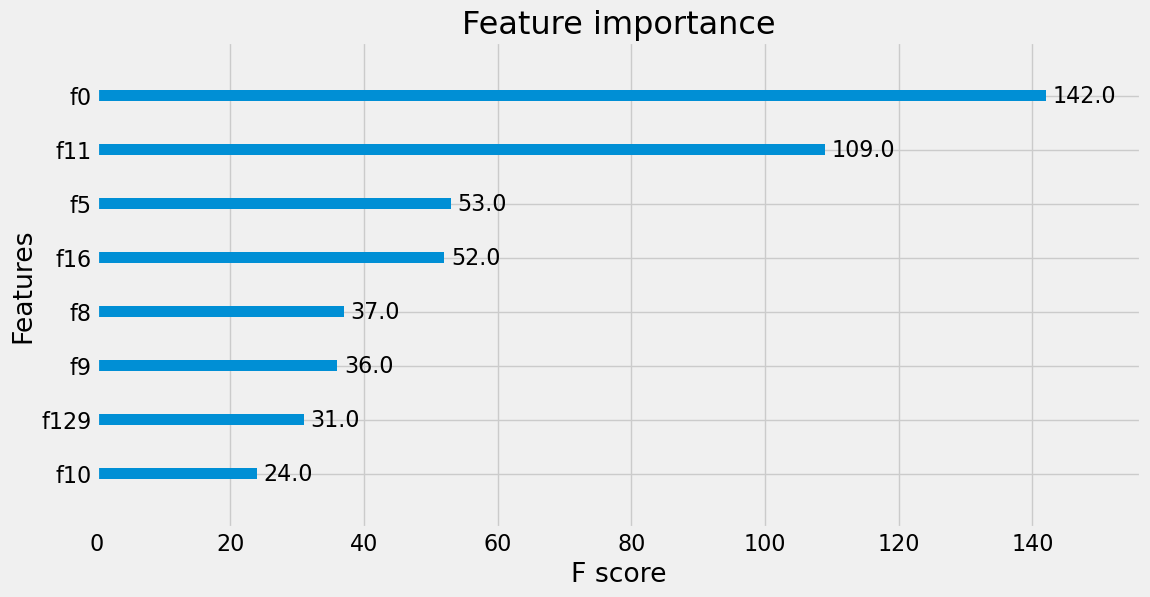

In [111]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.rcParams.update({'font.size': 16})

fig, ax = plt.subplots(figsize=(12,6))
plot_importance(model, max_num_features=8, ax=ax)
plt.show()

In [ ]:
def load_contract():
    
#    with open(Path('../##Contract address')) as f:
        contract_abi = json.load(f)
    
    contract_address = os.getenv("SMART_CONTRACT_ADDRESS")
    
    contract = w3.eth.contract(address=contract_address, abi=contract_abi)
    return contract

if st.button("Estimated Price"):
    car_stats = contract.functions.XXXX().call()
    ml_function(car_stats)
    return y_pred
## gather sellers car parameters, put into dataframe and run model.predict(df)
#   return y_pred

In [112]:
### To import a function to the buyer or seller.py file
from ml_model.ml_model import ml_function
###

def ml_function(car_stats):
    model.predict(car_stats)
    return y_pred

ModuleNotFoundError: No module named 'my_functions'